In [85]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from interval import Interval

# Regression(回归)

## 基本概念


所谓Regression，就是找到一个函数，使得对于每一组输入，都能得到一个scalar输出。典型的应用场景包括：
* 股市预测。通过一系列的经济指标值，计算出未来某日的股市指数。
* 自动驾驶。通过汽车感知道路的一系列参数，如道路宽度、前方弯道、变线、周边行人、车辆、等参数，计算出方向盘的角度。
* 商品推荐。通过计算消费者历史购买记录，判断出其对新商品的购买可能性

## 算法步骤

Regression的一般步骤为，下面根据李宏毅机器学习教程，以预测pokemon进化后CP值为例：
1. Step 1:构建一个model(模型)
![model](./img/linearmodel.png)
如上图所示，首先构建一个类似于$y=b+\sum{w_i*x_i}$的模型（这里是一个线性模型，Linear Model），其中：<enter>
* $x_i:x_{cp}、x_{hp}...$，对应于事物的一系列feature（特征）<space><space><enter>
* $w_i$,weight, 特征的权重<enter>
* $b$,bias,偏置<enter>
    
这里，先只使用一个特征，即$y=b+w*x$  
    
2. 确定评价函数（损失函数）

    确定模型后，开始训练模型。  
    如下是一组$（x，\hat{y}）$训练数据。

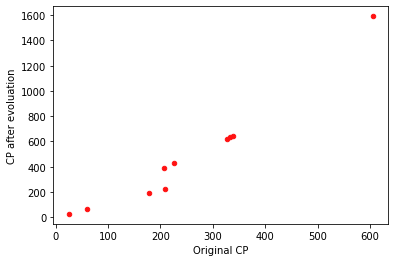

In [10]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
plt.xlabel('Original CP')
plt.ylabel('CP after evoluation')
plt.scatter(x_data, y_data, s=20, c="#ff1212", marker='o')

有了这些真实数据，如何衡量训练出来的模型好坏呢？在数学意义上，可以理解为距离。**即好的模型预测的结果应该尽量的离真实值近，坏的模型预测的结果会远离真实值。** 即求实际进化后的CP值与模型预测的CP值之差，来判定模型的好坏。  
使用**Loss Function**(损失函数)来衡量模型的好坏。定义损失函数为：  
$L(f)=\sum_{i=0}^n{(y_n-f(x_i))^2}$  
即：$L(w,b)=\sum_{i=0}^n{(y_n-(b+w*x_i))^2}$  

3. 找到最好的一个函数  
找到最好一个函数，也就是找到函数$y=b+w*x$最佳的一组参数$(w,b)$,使得损失函数的值最小。
![bestfunction](./img/bestfunction.png)
如何找到这一组参数呢？可以使用梯度下降法（Gradient Descent)  
所谓梯度，需要区分单变量和多变量：
* 在单变量函数中，梯度就是函数的微分（导数），代表着函数在某个给定点切线的斜率
* 在多变量函数中，梯度是一个向量，向量的放心指出了函数在给定点上升最快的方向。

所谓梯度下降，就是一种“下山最快路径”算法，目的是尽快的找到函数的全局最优解
![gradientdesent.png](./img/gradientdesent.png)
首先在这里引入一个概念 学习率 ：移动的步长，如图7中$\eta$
步骤1：随机选取一组w0
步骤2：计算微分，也就是当前的斜率，根据斜率来判定移动的方向  
    大于0向左移动（减少w）
    小于0向右移动（增加w）
步骤3：根据学习率移动，
重复步骤2和步骤3，直到找到最低点

In [124]:
x = np.arange(-4000, 4000, 2)
print(len(x))
y = np.arange(-2000, 2000, 1)
print(len(y))

4000
4000


4000
4000


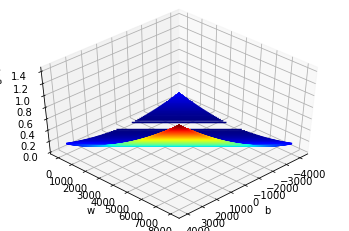

In [129]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
# y_data = b+w*x_data
#构建坐标轴x：b
# x = np.arange(-200, 200, 1)
#构造坐标轴y：w
x = np.arange(-4000, 4000, 2)
print(len(x))
y = np.arange(0, 8000, 2)
print(len(y))
#构造坐标轴z：Loss（w,b)
Z = np.zeros((len(x), len(y)))
min_area = Interval(-10000,10000)
for i in range(len(y)):
    for j in range(len(x)):
        b = x[j]
        w = y[i]
        Z[i][j] = 0
        Z[i][j] = (b + w)**2
#         for n in range(len(x_data)):
#             Z[i][j] = Z[i][j] + (y_data[n] - b - w*x_data[n])**2
        #print("i:%d--j:%d--w:%.1f--b:%d--loss:%.1f" % (i, j, w, b, Z[i][j]))
#         Z[i][j] = Z[i][j]/len(x_data)
        
b = -120
w = -4
lr = 0.000001
iteration = 100000

b_history = [b]
w_history = [w]

# for i in range(iteration):
#     b_grad = 0.0
#     w_grad = 0.0
#     for n in range(len(x_data)):
#         b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
#         w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
#     b = b - lr*b_grad
#     w = w - lr*w_grad
    
#     b_history.append(b)
#     w_history.append(w)
# print(b_history[0:1000])
# print(w_history[0:1000])
# plt.contour(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
# plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
# plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
# plt.xlim(-200,-100)
# plt.ylim(-5,5)
# plt.xlabel(r'$b$', fontsize=16)
# plt.ylabel(r'$w$', fontsize=16)
# plt.show() 
fig = plt.figure()
ax = plt.axes(projection="3d")
# X, Y = np.mgrid[-1:1:30j, -1:1:30j]
# Z = np.sin(np.pi*X)*np.sin(np.pi*Y)
ax.contour3D(x, y, Z, 500, cmap='jet')
ax.set_xlabel('b')
ax.set_ylabel('w')
# ax.set_zlabel('Loss(w,b)')
ax.view_init(45,45)
# plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
# ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
# ax.contour(x, y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.show()
    


In [61]:
print(640-338*1.4)

166.8


In [79]:
print(1200**2)

1440000
